In [1]:
!pip install feature_engine

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from feature_engine import variable_transformers as vt
from feature_engine import missing_data_imputers as mdi
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#importing data and exploring it
path='../input/house-prices-advanced-regression-techniques/'
train_data=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
print('train data shape:',train_data.shape)
print(train_data.info())
train_data.head()


train data shape: (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null objec

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Explanation:
MSSubClass: It is an categorical variable rather than numerical.
MSZoning: Categorical
Street: Categorical
Alley: Categorical(NA Means no alley)
LotShape:Categorical
LandContour: Categorical
Utilities:Categorical
LotConfig:Categorical
LandSlope:Categorical
Neighborhood:Categorical(lots of categories so cardinality may be present)
Condition1: Categorical
Condition2:Categorical
BldgType:Categorical
HouseStyle: Categorical
OverallQual:Categorical(Rating order matters)
OverallCond:Categorical(Rating order matters)
RoofStyle:Categorical
RoofMatl:Categorical
Exterior1st: Categorical(Rare label may be a problem)
Exterior2nd: Categorical(Rare label may be a problem),( nan means no 2nd exterior material)
MasVnrType:Categorical
ExterQual:Categorical(Rating order matters)
ExterCond:Categorical(Rating order matters)
BsmtQual:Categorical(Rating order matters), NA means no basement
BsmtCond: Categorical(Rating order matters), NA means no basement
BsmtExposure:Categorical(Rating order matters), NA means no basement
BsmtFinType1: Categorical(Rating order matters), NA means no basement
BsmtFinType2: Categorical(Rating order matters), NA means no basement
GarageFinish:Categorical(Rating order matters),NA means no garage
GarageQual: Categorical(Rating order matters),NA means no garage
GarageCond:Categorical(Rating order matters),NA means no garage
PoolQC:Categorical(Rating order matters),NA means no pool
Fence:Categorical,NA means no fence
PavedDrive:Categorical
Foundation:Categorical		
CentralAir:Categorical	
MiscFeature: Categorical, NA means none	
Heating:Categorical
Electrical:Categorical	
Functional: Categorical	
HeatingQC: Categorical(Rating order matters)
KitchenQual: Categorical(Rating order matters)
FireplaceQu:Categorical(Rating order matters), NA means no fireplace
GarageType:Categorical, NA means no garage
SaleType:Categorical
SaleCondition: Categorical
MasVnrArea:Numerical
BsmtFinSF1:  Numerical, NA means no basement
BsmtFinSF2:Numerical,    NA means no basement
BsmtUnfSF:Numerical,    NA means no basement
TotalBsmtSF: Numerical,  NA means no basement
1stFlrSF: Numerical
2ndFlrSF:Numerical
LowQualFinSF:Numerical
GrLivArea: Numerical
BsmtFullBath:Numerical
BsmtHalfBath:Numerical
FullBath:Numerical
HalfBath: Numerical
Bedroom:Numerical
Kitchen:Numerical
TotRmsAbvGrd: Numerical
Fireplaces: Numerical, NA means no fireplace
GarageCars:Numerical
GarageArea: Numerical,Size of garage in square feet:
WoodDeckSF:Numerical
OpenPorchSF:Numerical
EnclosedPorch: Numerical
3SsnPorch:Numerical
ScreenPorch: Numerical
PoolArea: Numerical
MiscVal:Numerical
LotFrontage: Numerical
LotArea: Numerical
**Time variable:**
MoSold: Numerical
YrSold:Numerical
YearBuilt:Numerical
YearRemodAdd: Numerical
GarageYrBlt: Numerical

In [5]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

From the explaination of data it is clear that MSSubClass is an categorical variable. So all the numerical values has been replaced by there respective category.

In [6]:
train_data['MSSubClass'][train_data['MSSubClass'] == 20] = '1-STORY 1946 & NEWER ALL STYLES'
train_data['MSSubClass'][train_data['MSSubClass'] == 30] = '1-STORY 1945 & OLDER'
train_data['MSSubClass'][train_data['MSSubClass'] == 40] = '1-STORY W/FINISHED ATTIC ALL AGES'
train_data['MSSubClass'][train_data['MSSubClass'] == 45] = '1-1/2 STORY - UNFINISHED ALL AGES'
train_data['MSSubClass'][train_data['MSSubClass'] == 50] = '1-1/2 STORY FINISHED ALL AGES'
train_data['MSSubClass'][train_data['MSSubClass'] == 60] = '2-STORY 1946 & NEWER'
train_data['MSSubClass'][train_data['MSSubClass'] == 70] = '2-STORY 1945 & OLDER'
train_data['MSSubClass'][train_data['MSSubClass'] == 75] = '2-1/2 STORY ALL AGES'
train_data['MSSubClass'][train_data['MSSubClass'] == 80] = 'SPLIT OR MULTI-LEVEL'
train_data['MSSubClass'][train_data['MSSubClass'] == 85] = 'SPLIT FOYER'
train_data['MSSubClass'][train_data['MSSubClass'] == 90] = 'DUPLEX - ALL STYLES AND AGES'
train_data['MSSubClass'][train_data['MSSubClass'] == 120] = '1-STORY PUD (Planned Unit Development) - 1946 & NEWER'
train_data['MSSubClass'][train_data['MSSubClass'] == 150] = '1-1/2 STORY PUD - ALL AGES'
train_data['MSSubClass'][train_data['MSSubClass'] == 160] = '2-STORY PUD - 1946 & NEWER'
train_data['MSSubClass'][train_data['MSSubClass'] == 180] = 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'
train_data['MSSubClass'][train_data['MSSubClass'] == 190] = '2 FAMILY CONVERSION - ALL STYLES AND AGES'

In [7]:
#Find the columns having missing values
train_data.columns[train_data.isnull().sum()>0]


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [8]:
#Find percentage of missing values in each column
train_data.isnull().mean().sort_values(ascending=False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageCond       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtExposure     0.026027
BsmtFinType2     0.026027
BsmtFinType1     0.025342
BsmtCond         0.025342
BsmtQual         0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Utilities        0.000000
YearRemodAdd     0.000000
MSSubClass       0.000000
Foundation       0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
RoofStyle        0.000000
YearBuilt        0.000000
LotConfig        0.000000
OverallCond      0.000000
OverallQual      0.000000
HouseStyle       0.000000
BldgType         0.000000
Condition2       0.000000
BsmtFinSF1       0.000000
MSZoning         0.000000
LotArea     

There are some variables for which missing value means that feature is not present in house.It is explained in the dataset explanation. Such as garage type will be missing if the house has no garage. So these missing values can be imputed by missing category. 

In [9]:
train_data['MasVnrArea'][(train_data.MasVnrType.isnull()==True) & (train_data.MasVnrArea.isnull()==True)] =0
train_data['GarageYrBlt'][(train_data.GarageType.isnull()==True) & (train_data.GarageYrBlt.isnull()==True)] =0



In [10]:
ordinal_variable=['ExterQual','ExterCond','BsmtCond','BsmtQual','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC','BsmtExposure','BsmtFinType1','BsmtFinType2']
for i in ordinal_variable:
    train_data[i] = train_data[i].fillna('None')

In [11]:
#Function to convert quality variables into ordinal values
def fixing_ordinal_variables(data, variable):
    data[variable][data[variable] == 'Ex'] = 5
    data[variable][data[variable] == 'Gd'] = 4
    data[variable][data[variable] == 'TA'] = 3
    data[variable][data[variable] == 'Fa'] = 2
    data[variable][data[variable] == 'Po'] = 1
    data[variable][data[variable] == 'None'] = 0

In [12]:
fixing_ordinal_variables(train_data,'ExterQual')
fixing_ordinal_variables(train_data,'ExterCond')
fixing_ordinal_variables(train_data,'BsmtCond')
fixing_ordinal_variables(train_data,'BsmtQual')
fixing_ordinal_variables(train_data,'HeatingQC')
fixing_ordinal_variables(train_data,'KitchenQual')
fixing_ordinal_variables(train_data,'FireplaceQu')
fixing_ordinal_variables(train_data,'GarageQual')
fixing_ordinal_variables(train_data,'GarageCond')
fixing_ordinal_variables(train_data,'PoolQC')

In [13]:
train_data['BsmtExposure'][train_data['BsmtExposure'] == 'Gd'] = 4
train_data['BsmtExposure'][train_data['BsmtExposure'] == 'Av'] = 3
train_data['BsmtExposure'][train_data['BsmtExposure'] == 'Mn'] = 2
train_data['BsmtExposure'][train_data['BsmtExposure'] == 'No'] = 1
train_data['BsmtExposure'][train_data['BsmtExposure'] == 'None'] = 0

In [14]:
train_data['BsmtFinType1'][train_data['BsmtFinType1'] == 'GLQ'] = 6
train_data['BsmtFinType1'][train_data['BsmtFinType1'] == 'ALQ'] = 5
train_data['BsmtFinType1'][train_data['BsmtFinType1'] == 'BLQ'] = 4
train_data['BsmtFinType1'][train_data['BsmtFinType1'] == 'Rec'] = 3
train_data['BsmtFinType1'][train_data['BsmtFinType1'] == 'LwQ'] = 2
train_data['BsmtFinType1'][train_data['BsmtFinType1'] == 'Unf'] = 1
train_data['BsmtFinType1'][train_data['BsmtFinType1'] == 'None'] =0 

In [15]:
train_data['BsmtFinType2'][train_data['BsmtFinType2'] == 'GLQ'] = 6
train_data['BsmtFinType2'][train_data['BsmtFinType2'] == 'ALQ'] = 5
train_data['BsmtFinType2'][train_data['BsmtFinType2'] == 'BLQ'] = 4
train_data['BsmtFinType2'][train_data['BsmtFinType2'] == 'Rec'] = 3
train_data['BsmtFinType2'][train_data['BsmtFinType2'] == 'LwQ'] = 2
train_data['BsmtFinType2'][train_data['BsmtFinType2'] == 'Unf'] = 1
train_data['BsmtFinType2'][train_data['BsmtFinType2'] == 'None'] =0 

In [16]:
train_data.isnull().mean().sort_values(ascending=False)

MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
LotFrontage      0.177397
GarageType       0.055479
GarageFinish     0.055479
MasVnrType       0.005479
Electrical       0.000685
SalePrice        0.000000
ExterQual        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrArea       0.000000
BsmtQual         0.000000
ExterCond        0.000000
Foundation       0.000000
YearRemodAdd     0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinSF1       0.000000
BsmtFinType2     0.000000
RoofStyle        0.000000
OverallQual      0.000000
YearBuilt        0.000000
OverallCond      0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2  

Year variables don't have any significance at its own, so converting these variables to age of the house will provide a relevant information and drop the original variables.So three new variables(house_age, garage_age, remod_age) have created by eliminating YrSold, YearBuilt, YearRemodAdd, GarageYrBuilt.

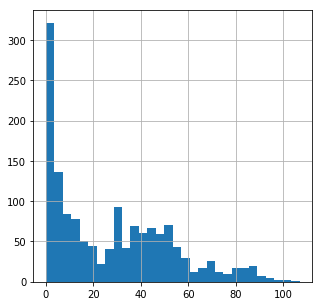

In [17]:
train_data['house_age']=train_data['YrSold']-train_data['YearBuilt']
train_data['remod_age']=train_data['YrSold']-train_data['YearRemodAdd']
train_data['garage_age']=train_data['YrSold']-train_data['GarageYrBlt']
train_data['garage_age'] = train_data['garage_age'].map(lambda x: 0 if x > 1000 else x)
train_data['house_age'] = train_data['house_age'].map(lambda x: 0 if x < 0 else x)
train_data['remod_age'] = train_data['remod_age'].map(lambda x: 0 if x < 0 else x)
train_data['garage_age'] = train_data['garage_age'].map(lambda x: 0 if x < 0 else x)
train_data.drop(['YrSold','MoSold','YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1,inplace=True)
train_data['garage_age'].hist(bins=30, figsize=(5,5))
plt.show()

SalePrice is skewed variable, so log transformation of this variable will make it linear target variable.

In [18]:
train_data["TransformedPrice"] = np.log(train_data["SalePrice"])

In [19]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [20]:
#Splitting train_data into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(
    train_data[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal','SaleType',
       'SaleCondition','house_age','remod_age','garage_age']],  # predictors
    train_data['TransformedPrice'],  # target
    test_size=0.20,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_val.shape

((1168, 78), (292, 78))

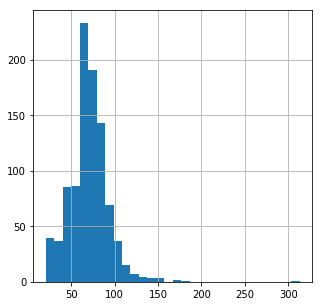

In [21]:
X_train['LotFrontage'].hist(bins=30, figsize=(5,5))
plt.show()

Handling missing variables: Plotting the histogram of LotFrontage shoes that it is an skewed variables so missing values can be imputed by median of this variable.
Electrical variable has very few missing values so these values can be imputed by mode.
While the categorical variable having very high missing values can be imputed by Missing Categorical Imputer

In [22]:
median_train = X_train['LotFrontage'].median()
mean_train = X_train['LotFrontage'].mean()
print(median_train)
print(mean_train)

69.0
69.61401673640168


In [23]:
X_train.shape

(1168, 78)

In [24]:
pipe_1 = Pipeline([
    ('imputer_mode', mdi.FrequentCategoryImputer(variables=['Electrical'])),
    ('imputer_missing', mdi.CategoricalVariableImputer(variables=['Alley', 
       'GarageFinish', 'Fence','MiscFeature','MasVnrType','GarageType'])),
    ('imputer_median',mdi.MeanMedianImputer(imputation_method='median',variables=['LotFrontage']))
])

In [25]:
pipe_1.fit(X_train)
X_train = pipe_1.transform(X_train)
X_val = pipe_1.transform(X_val)

# let's check null values are gone
X_train.isnull().mean().sort_values(ascending=False)

garage_age       0.0
BsmtQual         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtCond         0.0
RoofStyle        0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
RoofMatl         0.0
OverallCond      0.0
remod_age        0.0
LandContour      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
Utilities        0.0
OverallQual      0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
ScreenPorch      0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch

In [26]:
#Get unique category of each categorical variable to see if there is Cardinality
cat_var=list(X_train.select_dtypes(include=['object']).columns)
for i in list(X_train.select_dtypes(include=['object']).columns):
    print(i)
    print('X_train')
    print (X_train[i].unique())
    print('X_val')
    print (X_val[i].unique())
    print('---------')
cat_var

MSSubClass
X_train
['1-STORY 1946 & NEWER ALL STYLES' '1-STORY 1945 & OLDER'
 '2-STORY PUD - 1946 & NEWER' 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'
 '1-1/2 STORY FINISHED ALL AGES' '2-STORY 1946 & NEWER'
 '1-STORY PUD (Planned Unit Development) - 1946 & NEWER'
 'SPLIT OR MULTI-LEVEL' '2-1/2 STORY ALL AGES'
 '2 FAMILY CONVERSION - ALL STYLES AND AGES' '2-STORY 1945 & OLDER'
 'DUPLEX - ALL STYLES AND AGES' 'SPLIT FOYER'
 '1-1/2 STORY - UNFINISHED ALL AGES' '1-STORY W/FINISHED ATTIC ALL AGES']
X_val
['1-STORY 1946 & NEWER ALL STYLES' '1-1/2 STORY FINISHED ALL AGES'
 '2-STORY 1946 & NEWER' '2-STORY PUD - 1946 & NEWER'
 '1-STORY 1945 & OLDER'
 '1-STORY PUD (Planned Unit Development) - 1946 & NEWER'
 'DUPLEX - ALL STYLES AND AGES' 'SPLIT FOYER' '2-STORY 1945 & OLDER'
 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER' 'SPLIT OR MULTI-LEVEL'
 '2 FAMILY CONVERSION - ALL STYLES AND AGES'
 '1-STORY W/FINISHED ATTIC ALL AGES' '1-1/2 STORY - UNFINISHED ALL AGES'
 '2-1/2 STORY ALL AGES']
---------
MSZoning

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

MSSubClass


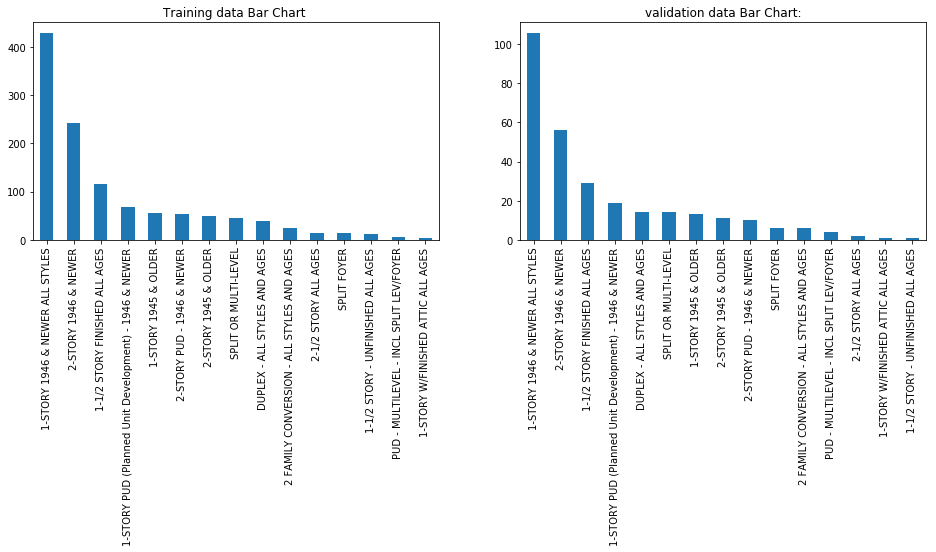

MSZoning


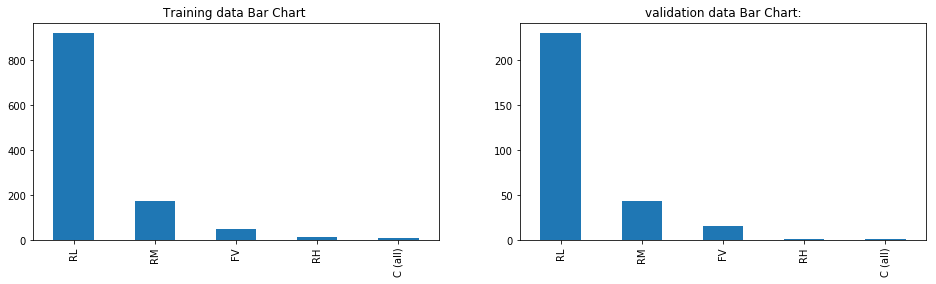

Street


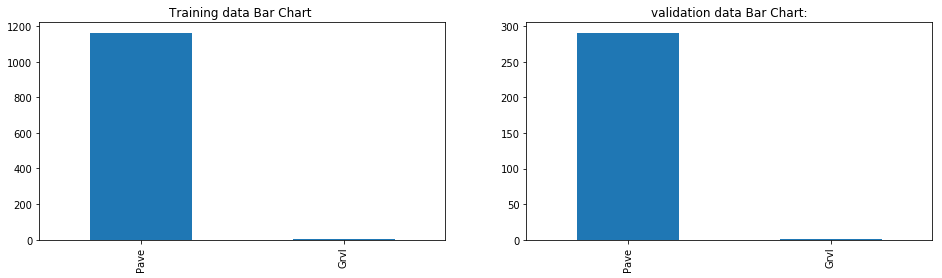

Alley


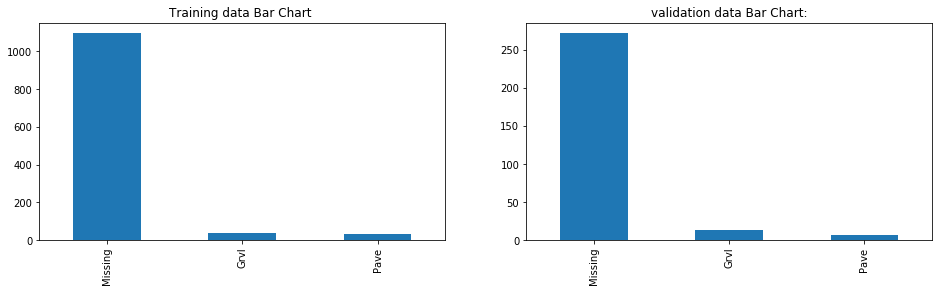

LotShape


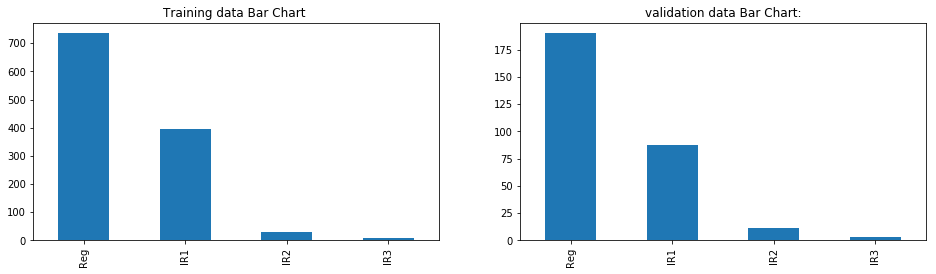

LandContour


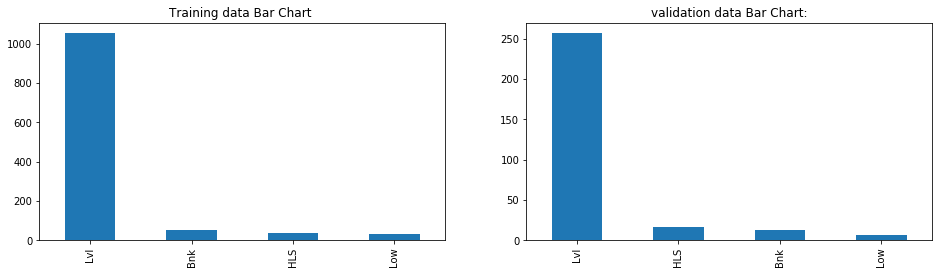

Utilities


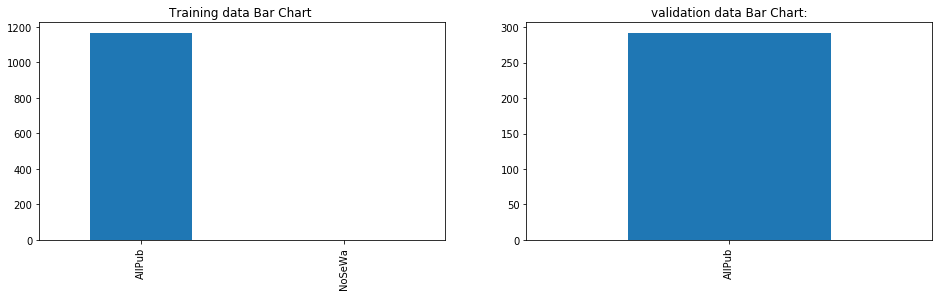

LotConfig


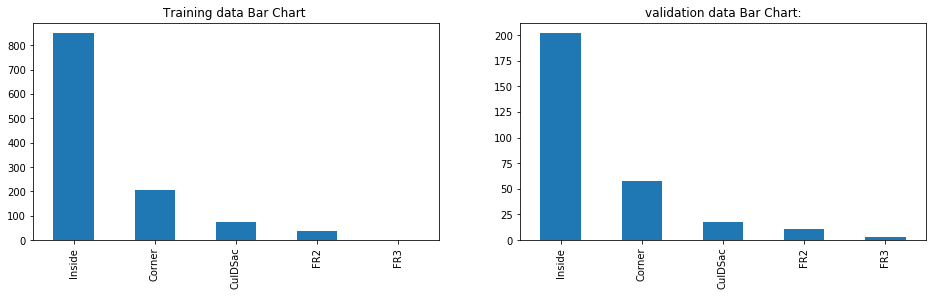

LandSlope


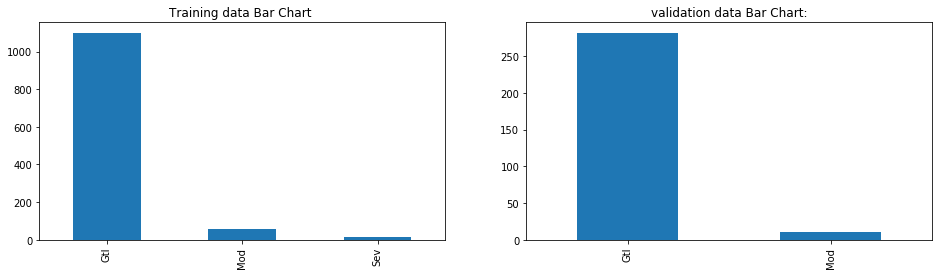

Neighborhood


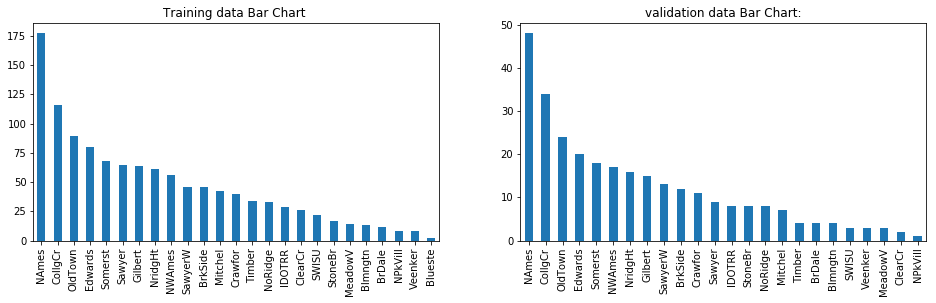

Condition1


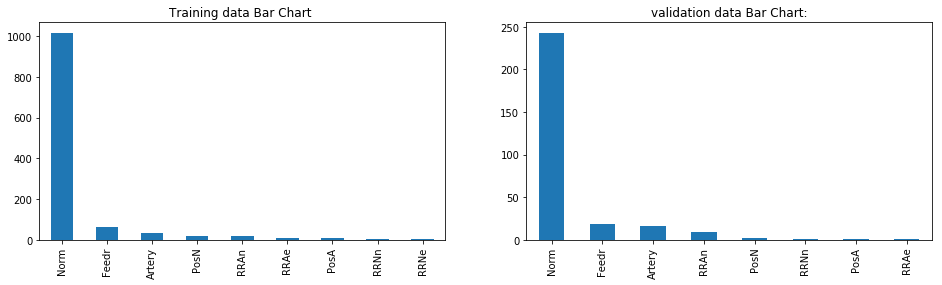

Condition2


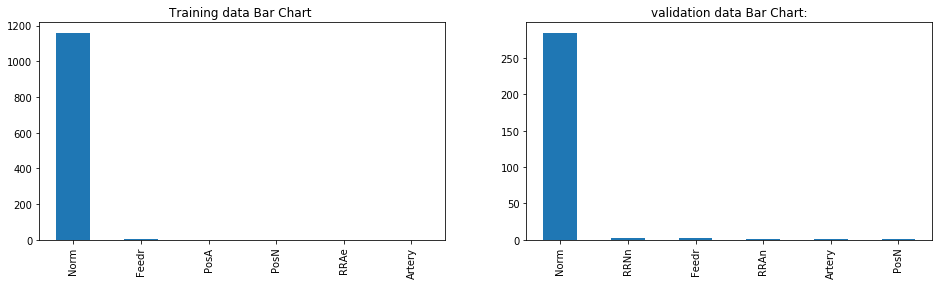

BldgType


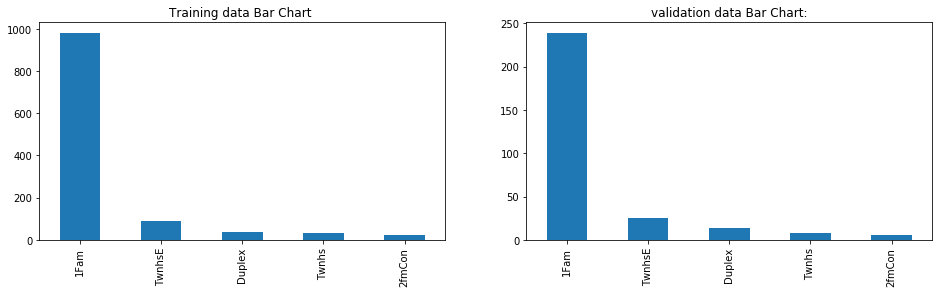

HouseStyle


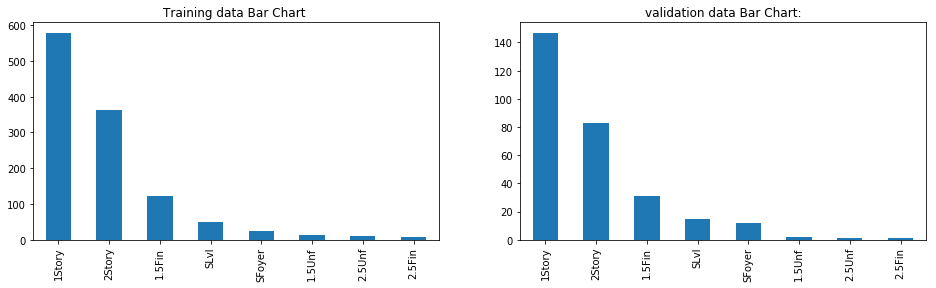

RoofStyle


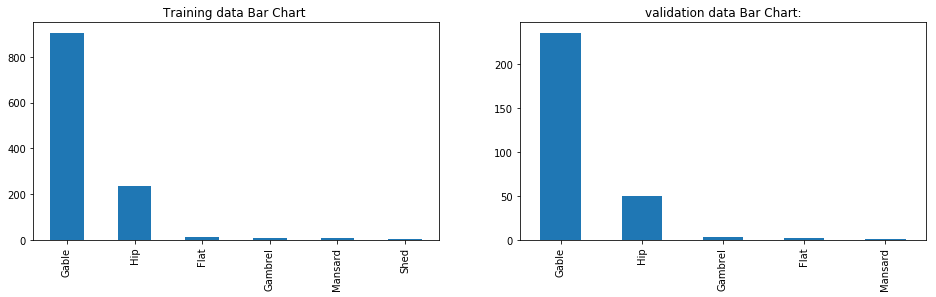

RoofMatl


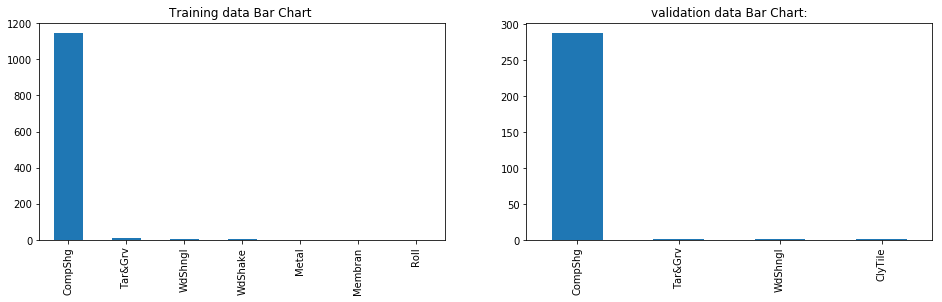

Exterior1st


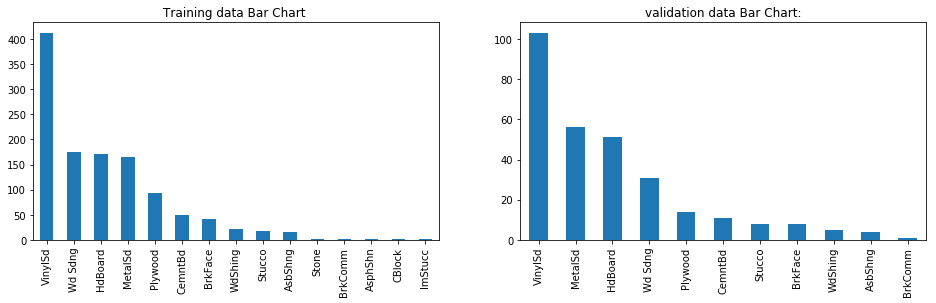

Exterior2nd


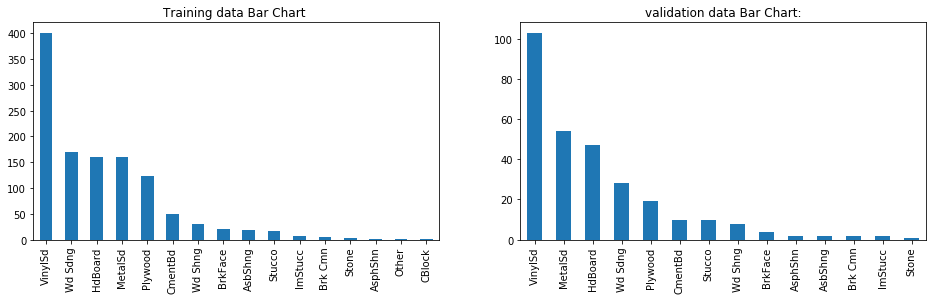

MasVnrType


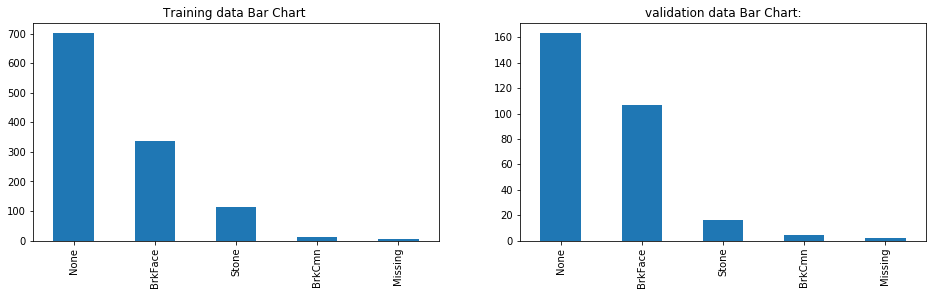

ExterQual


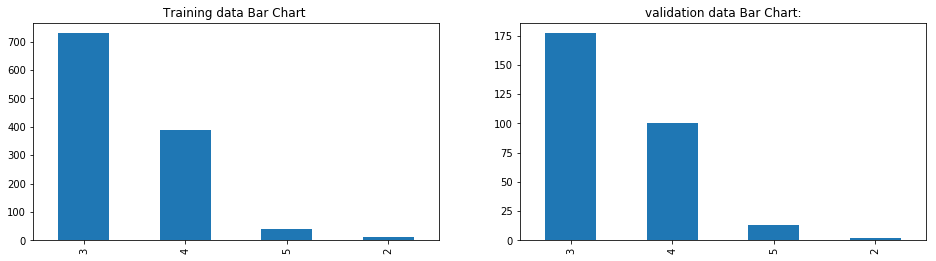

ExterCond


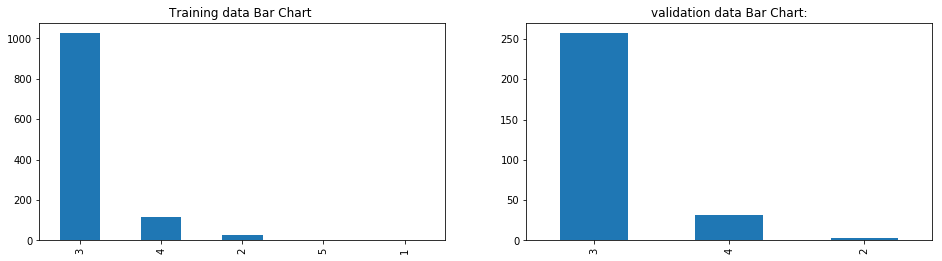

Foundation


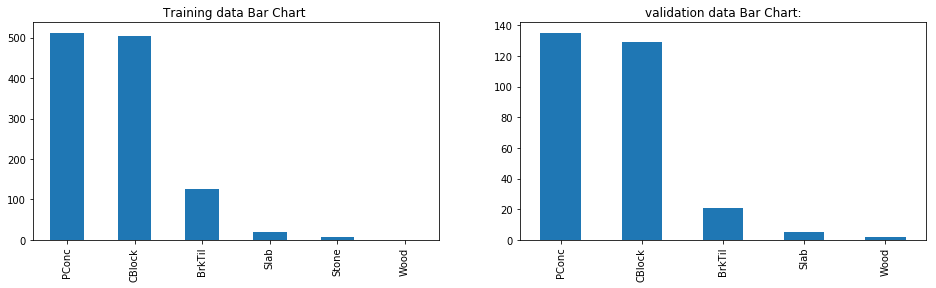

BsmtQual


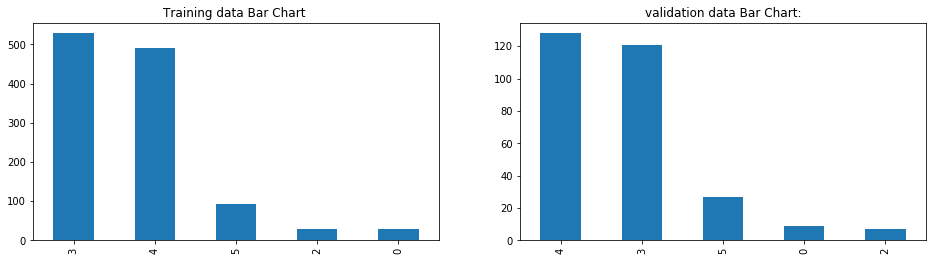

BsmtCond


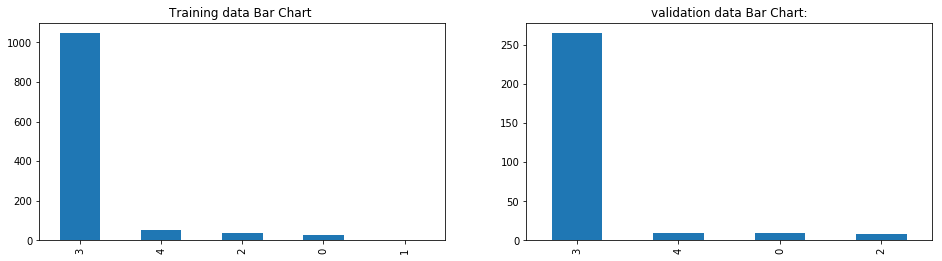

BsmtExposure


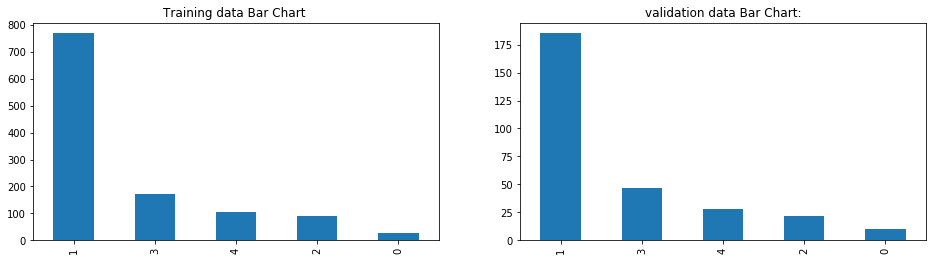

BsmtFinType1


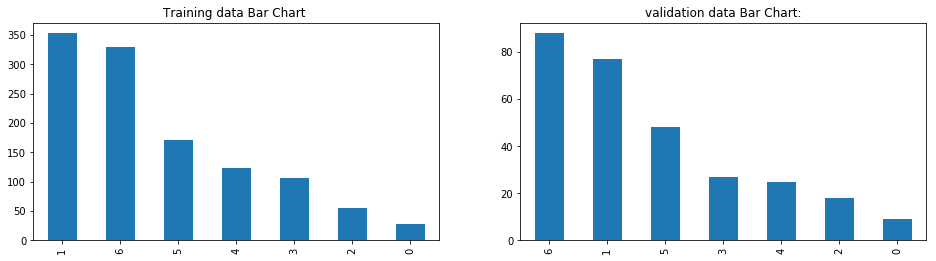

BsmtFinType2


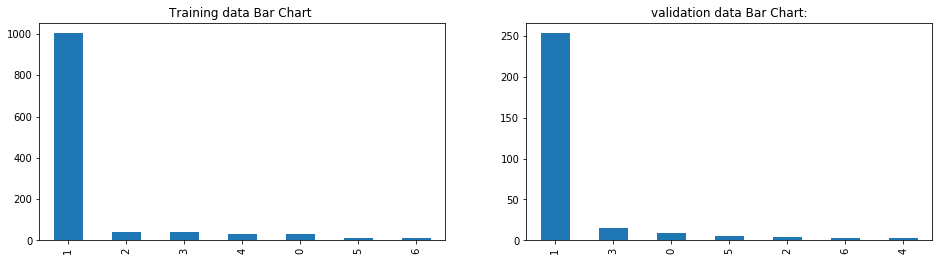

Heating


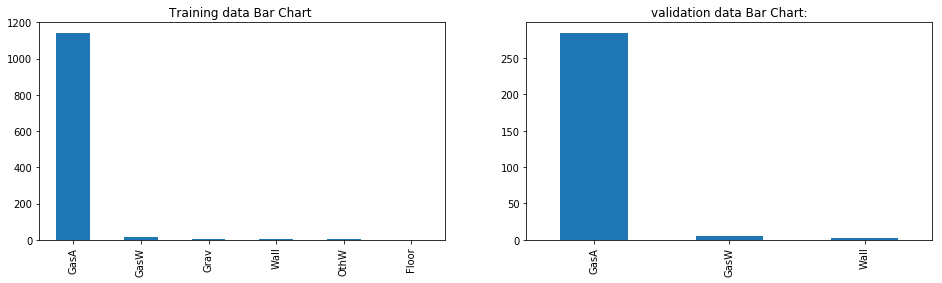

HeatingQC


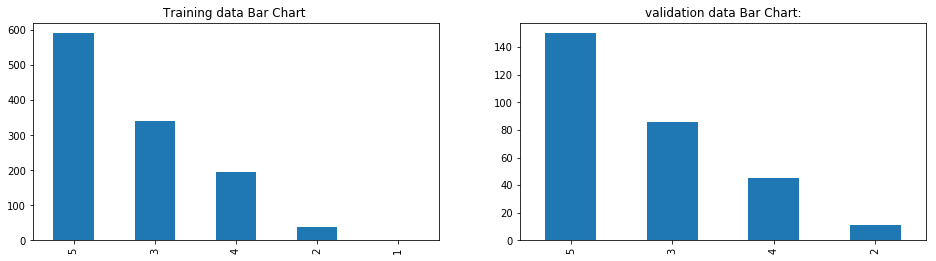

CentralAir


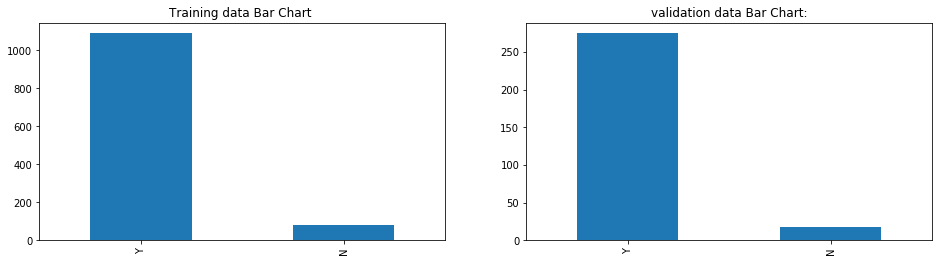

Electrical


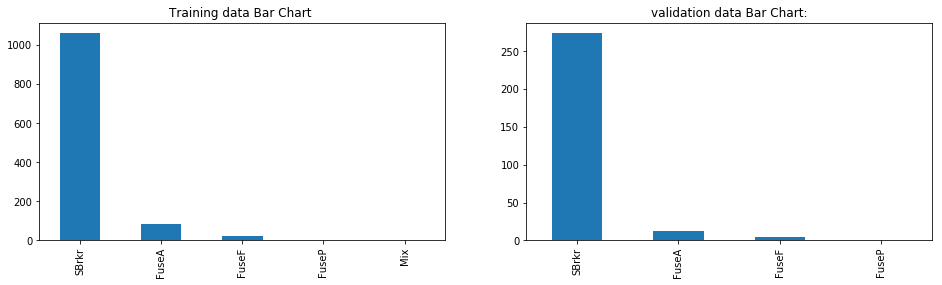

KitchenQual


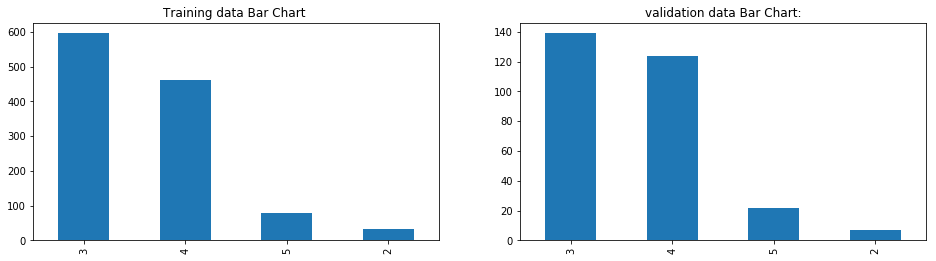

Functional


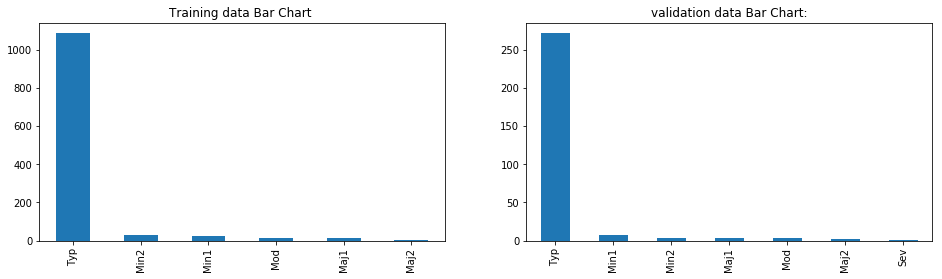

FireplaceQu


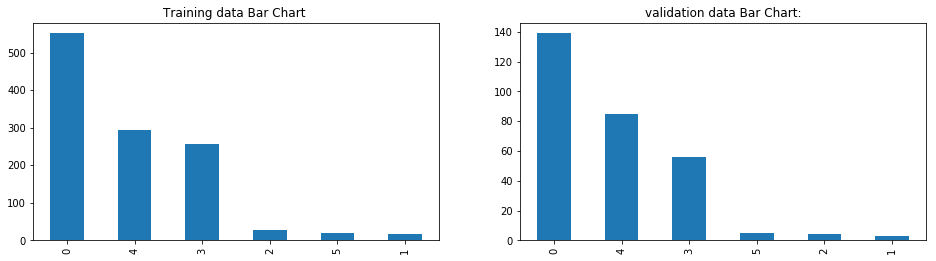

GarageType


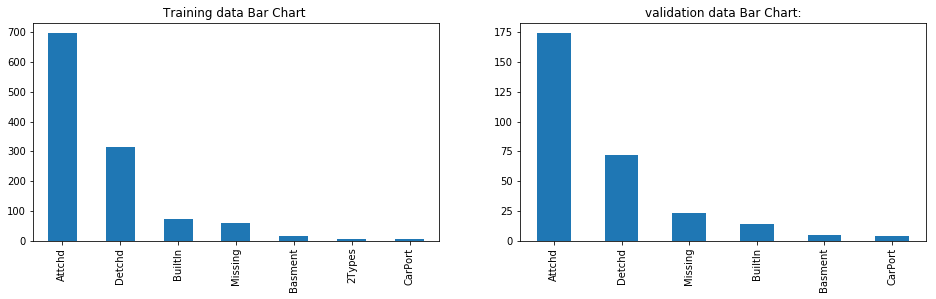

GarageFinish


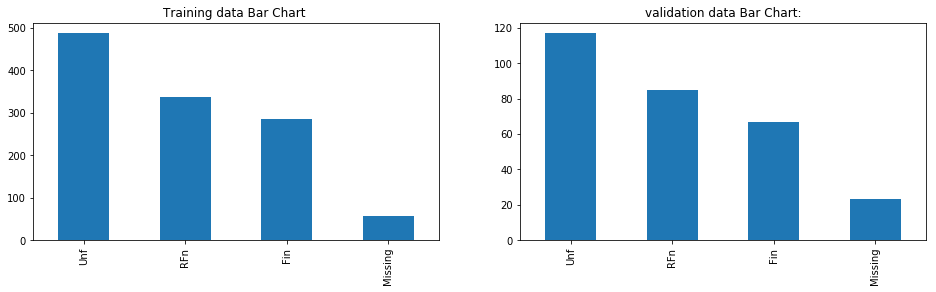

GarageQual


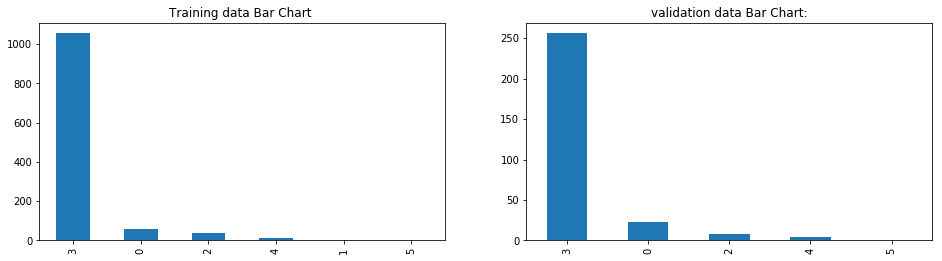

GarageCond


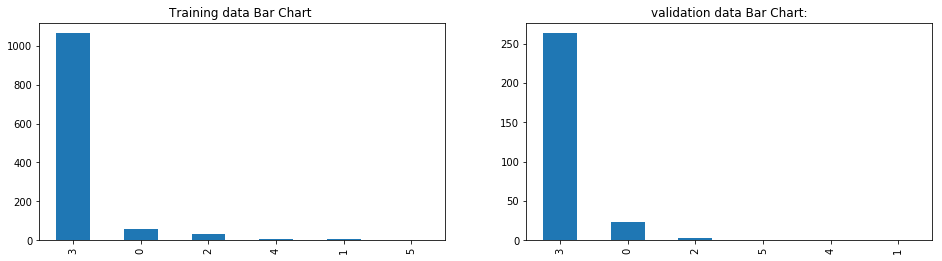

PavedDrive


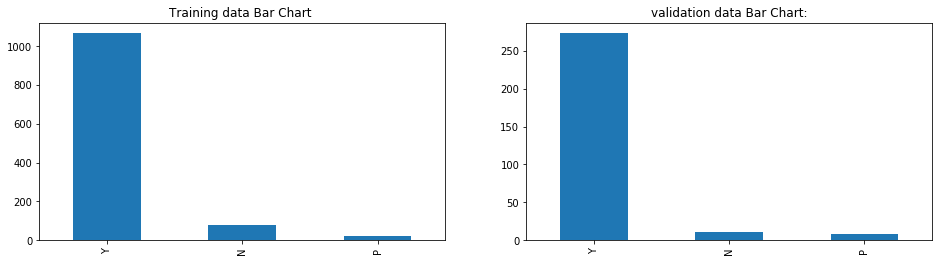

PoolQC


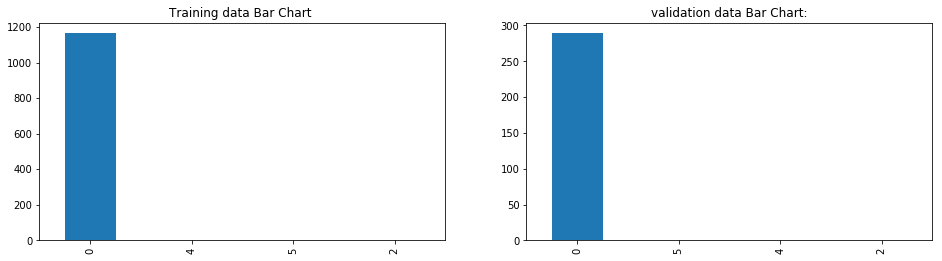

Fence


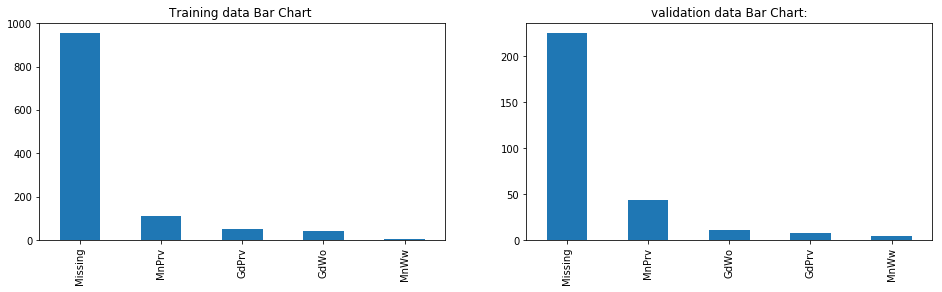

MiscFeature


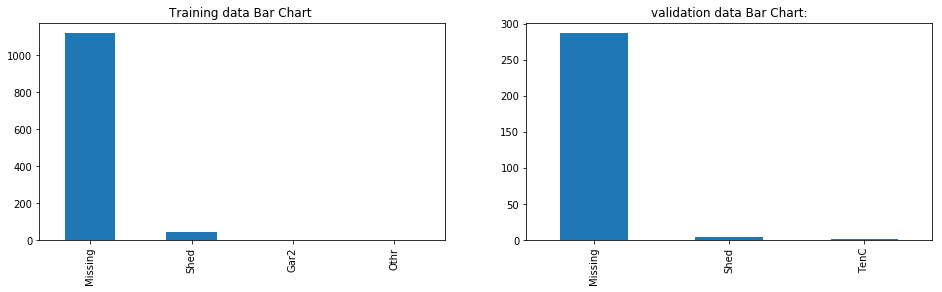

SaleType


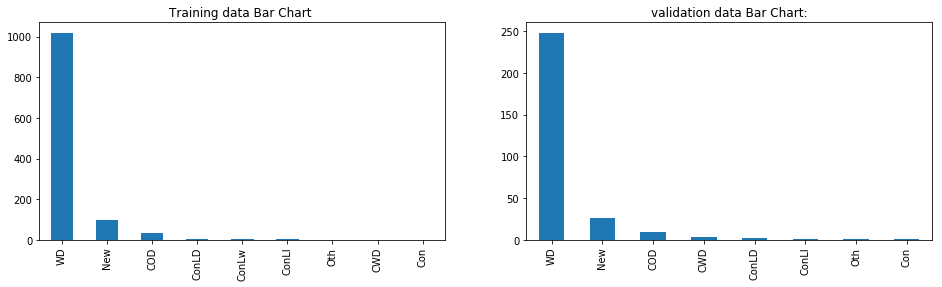

SaleCondition


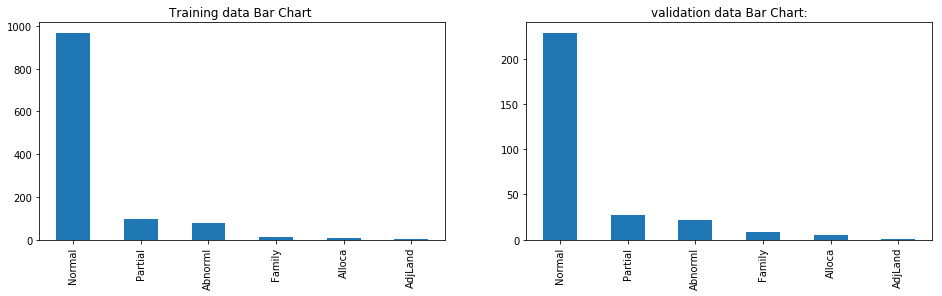

In [27]:
for i in cat_var:
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    X_train[i].value_counts().plot(kind='bar')
    print(i)
    plt.title('Training data Bar Chart ')

    plt.subplot(1, 2, 2)
    X_val[i].value_counts().plot(kind='bar')
    plt.title('validation data Bar Chart:')

    plt.show()

In [28]:
for col in X_train.columns:
    
    if X_train[col].dtypes == 'O': 
        
        if X_train[col].nunique() < 3: 
            
            print(X_train.groupby(col)[col].count() / len(X_train))
            print()

Street
Grvl    0.004281
Pave    0.995719
Name: Street, dtype: float64

Utilities
AllPub    0.999144
NoSeWa    0.000856
Name: Utilities, dtype: float64

CentralAir
N    0.066781
Y    0.933219
Name: CentralAir, dtype: float64



In [29]:
for col in X_train.columns:
    if X_train[col].dtypes == 'O':
        print(X_train.groupby(col)[col].count() / len(X_train))
        print()

MSSubClass
1-1/2 STORY - UNFINISHED ALL AGES                        0.009418
1-1/2 STORY FINISHED ALL AGES                            0.098459
1-STORY 1945 & OLDER                                     0.047945
1-STORY 1946 & NEWER ALL STYLES                          0.368151
1-STORY PUD (Planned Unit Development) - 1946 & NEWER    0.058219
1-STORY W/FINISHED ATTIC ALL AGES                        0.002568
2 FAMILY CONVERSION - ALL STYLES AND AGES                0.020548
2-1/2 STORY ALL AGES                                     0.011986
2-STORY 1945 & OLDER                                     0.041952
2-STORY 1946 & NEWER                                     0.208048
2-STORY PUD - 1946 & NEWER                               0.045377
DUPLEX - ALL STYLES AND AGES                             0.032534
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                  0.005137
SPLIT FOYER                                              0.011986
SPLIT OR MULTI-LEVEL                                     0.037671

To reduce the cardinality, rare label encoder is used. Neighbourhood and MSSubClass variable has high cardinality so tolerance is set to 0.05 while for rest of the variables it is set to 0.03.

In [30]:
pipe_2 = Pipeline([
    ('Rare Label .03',RareLabelCategoricalEncoder(
    tol=0.03,n_categories=3,variables=[ 'MSZoning','Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'Foundation', 'Heating','CentralAir', 'Electrical',
       'Functional',  'GarageType','GarageFinish', 'PavedDrive',
       'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'])
    ),
    ('Rare Label .05',RareLabelCategoricalEncoder(
    tol=0.05,n_categories=3,variables=[ 'Neighborhood','MSSubClass'])
    ),
])

In [31]:
pipe_2.fit(X_train)
X_train = pipe_2.transform(X_train)
X_val = pipe_2.transform(X_val)

In [32]:
for col in X_train.columns:
    if X_train[col].dtypes == 'O':
        print(X_train.groupby(col)[col].count() / len(X_train))
        print()

MSSubClass
1-1/2 STORY FINISHED ALL AGES                            0.098459
1-STORY 1946 & NEWER ALL STYLES                          0.368151
1-STORY PUD (Planned Unit Development) - 1946 & NEWER    0.058219
2-STORY 1946 & NEWER                                     0.208048
Rare                                                     0.267123
Name: MSSubClass, dtype: float64

MSZoning
FV      0.041952
RL      0.788527
RM      0.148973
Rare    0.020548
Name: MSZoning, dtype: float64

Street
Grvl    0.004281
Pave    0.995719
Name: Street, dtype: float64

Alley
Grvl       0.031678
Missing    0.939212
Pave       0.029110
Name: Alley, dtype: float64

LotShape
IR1     0.339041
Rare    0.031678
Reg     0.629281
Name: LotShape, dtype: float64

LandContour
Bnk     0.042808
Lvl     0.902397
Rare    0.054795
Name: LandContour, dtype: float64

Utilities
AllPub    0.999144
NoSeWa    0.000856
Name: Utilities, dtype: float64

LotConfig
Corner     0.175514
CulDSac    0.065068
FR2        0.030822
Inside   

Some variables seems to have very less relevance with target variable as they have one category with very high percentage. So dropping these variables seems a good desicion. 
street, utilities,condition 2, roofMat2,Alley,landslop,roofMat1, MiscFeature and Heating variables will be dropped.



In [33]:
X_train.drop(['Street',
       'Alley', 'Utilities','LandSlope','Condition2','RoofMatl', 'Heating','MiscFeature','Id'], axis=1,inplace=True)
X_val.drop(['Street',
       'Alley', 'Utilities','LandSlope','Condition2','RoofMatl', 'Heating','MiscFeature','Id'], axis=1,inplace=True)

**Outliers Handling**
Removing outliers before feature selection is a good practice.


In [34]:
# function to create histogram and boxplot


def diagnostic_plots(df, variable):
   
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

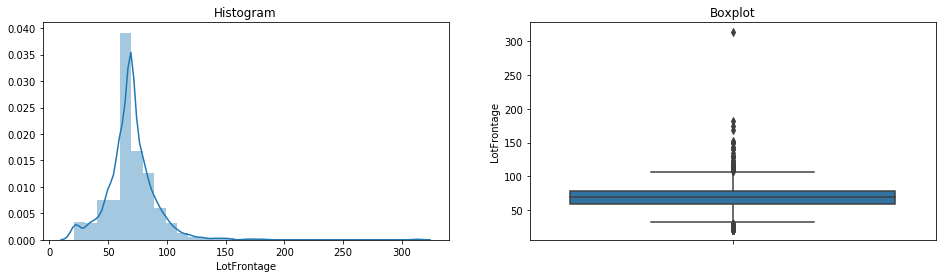

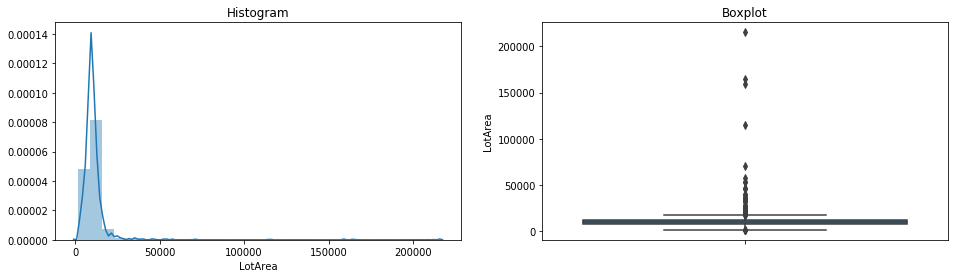

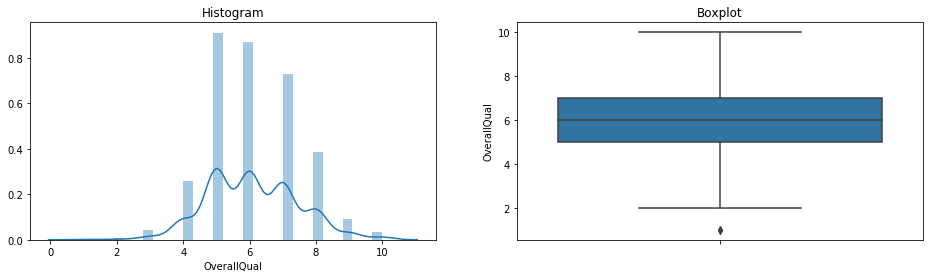

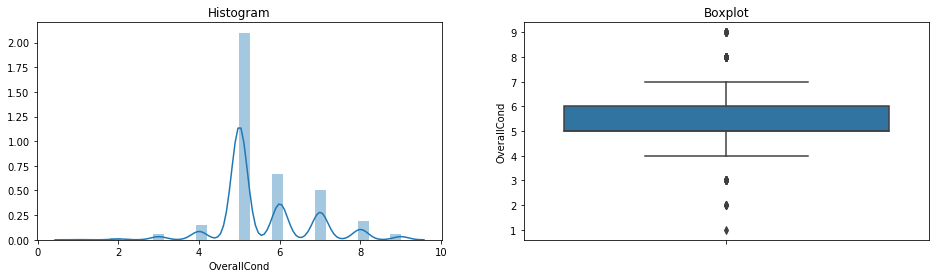

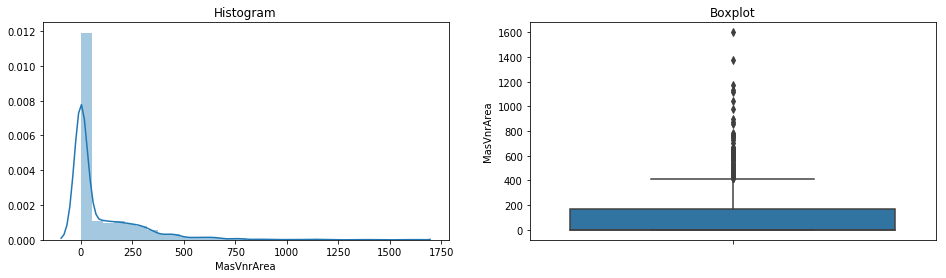

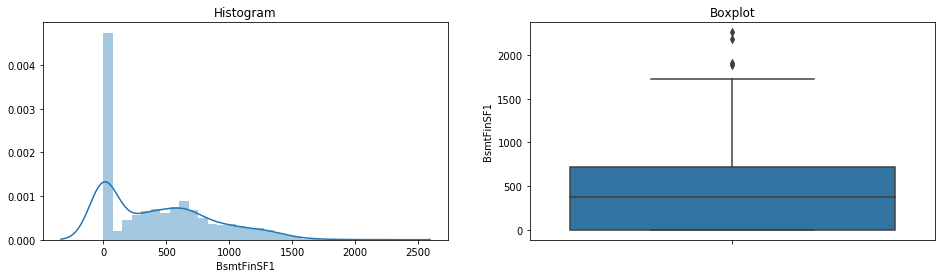

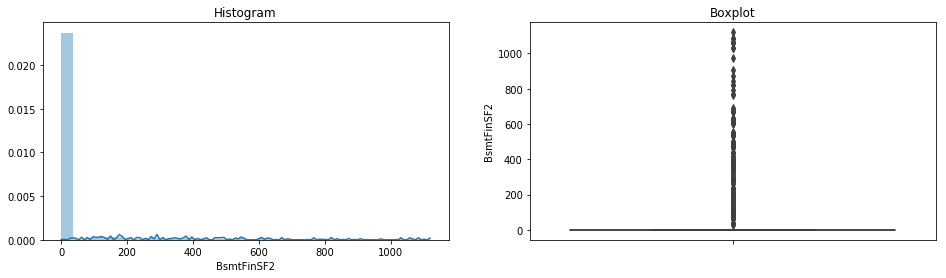

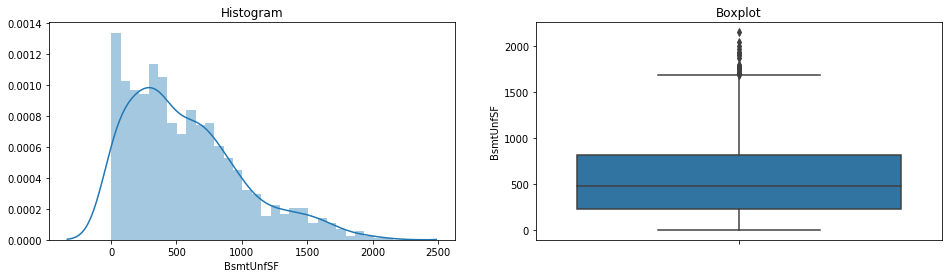

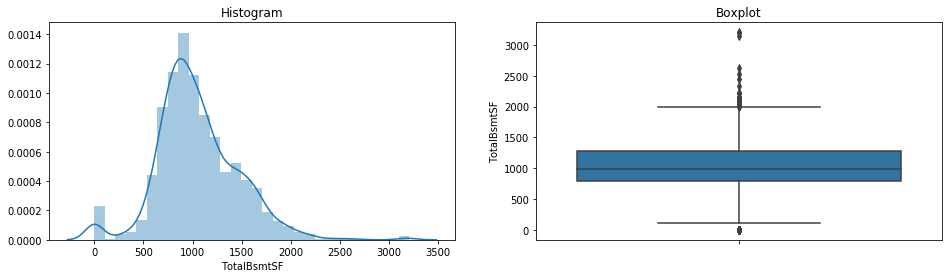

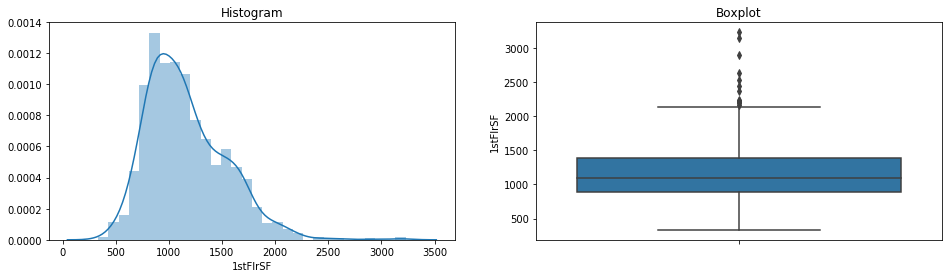

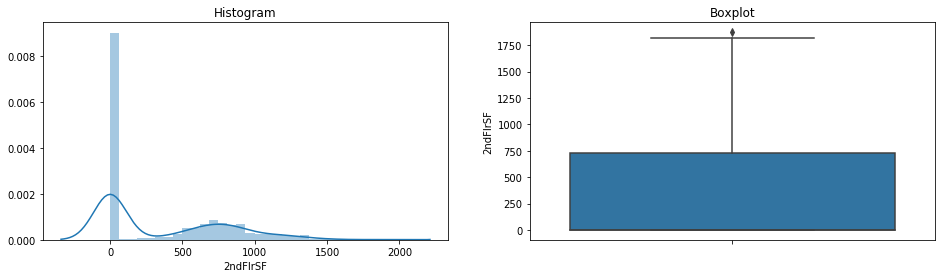

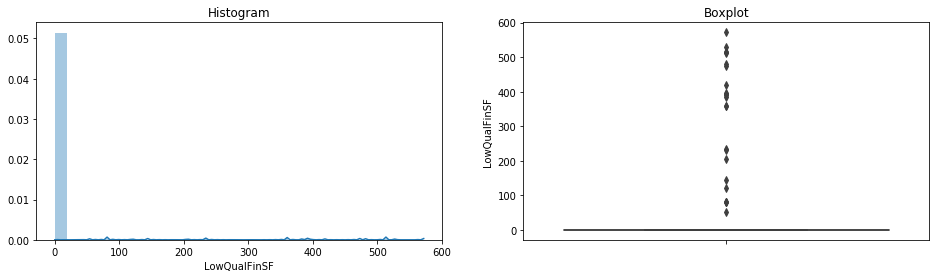

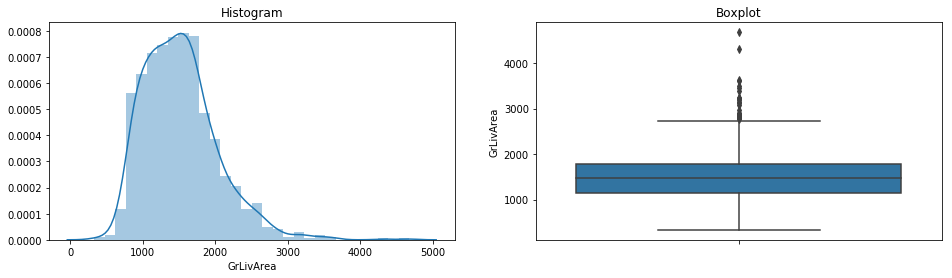

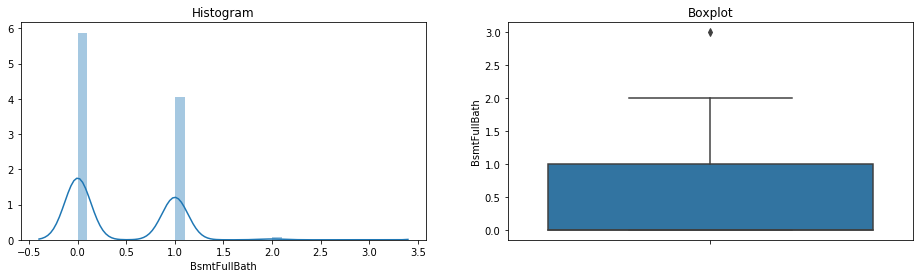

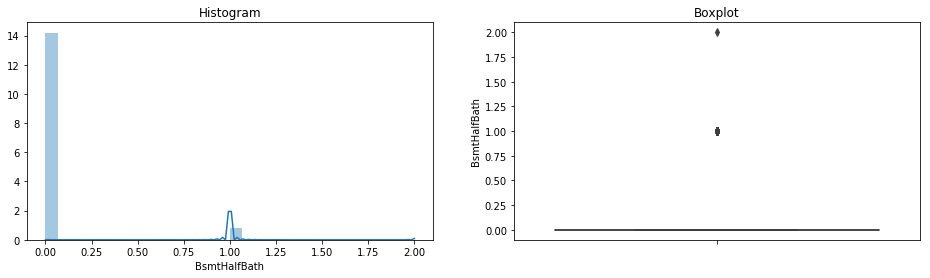

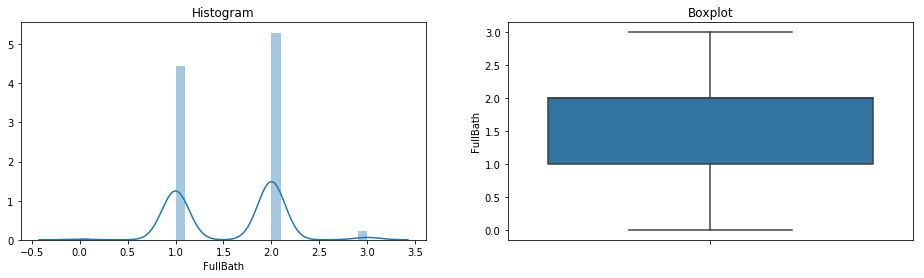

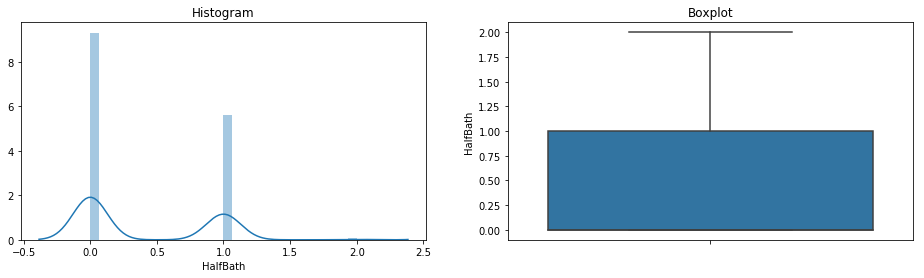

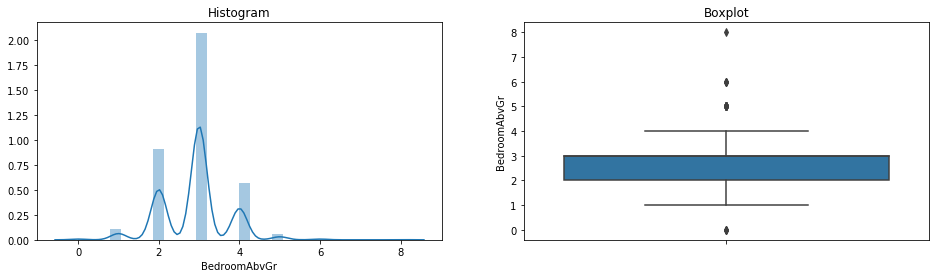

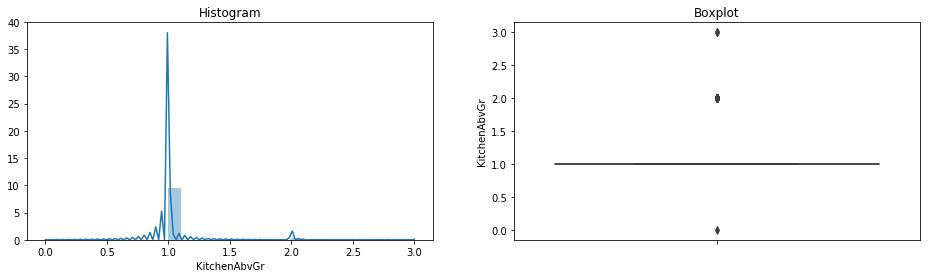

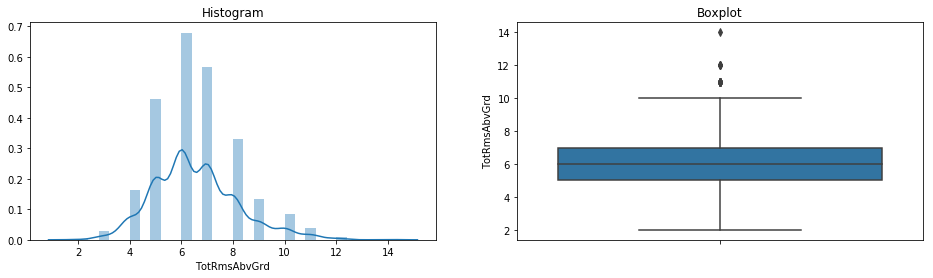

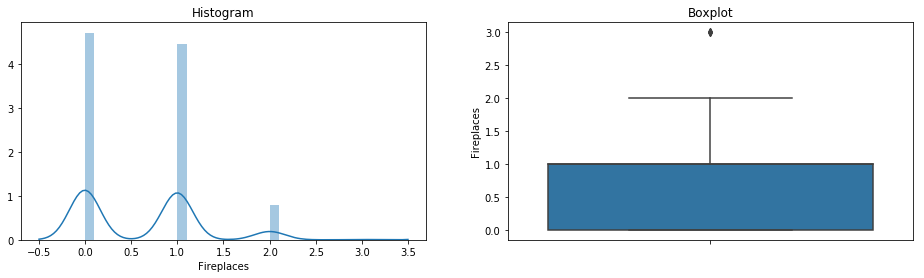

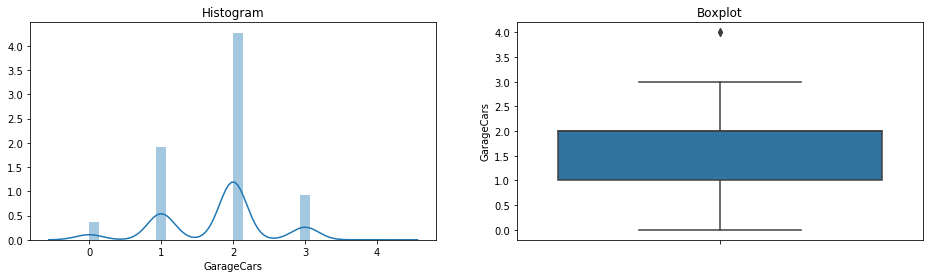

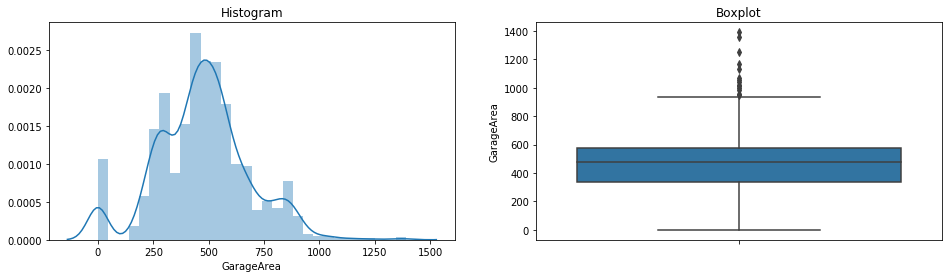

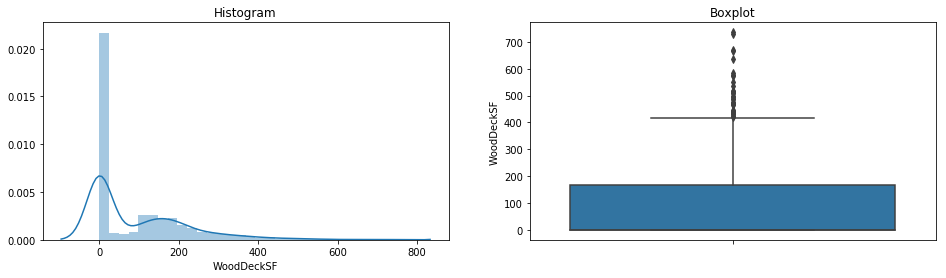

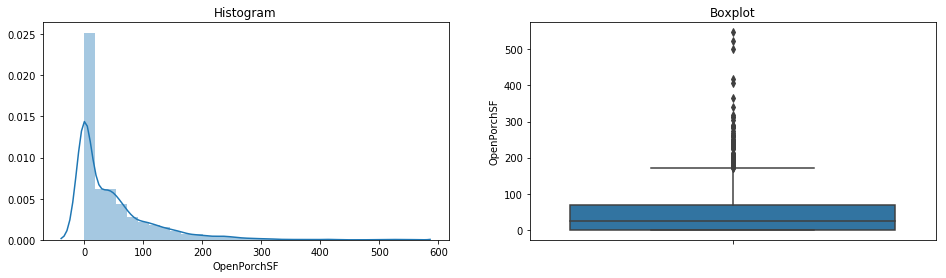

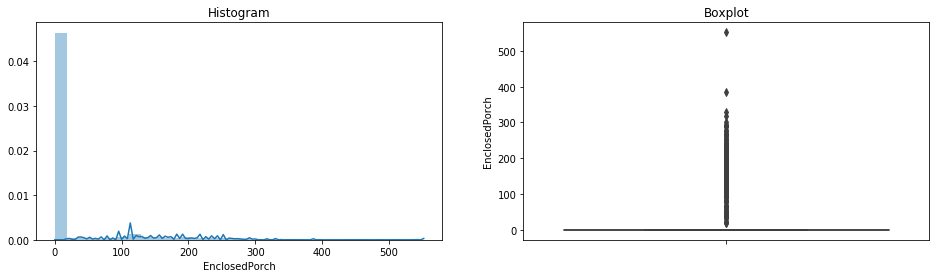

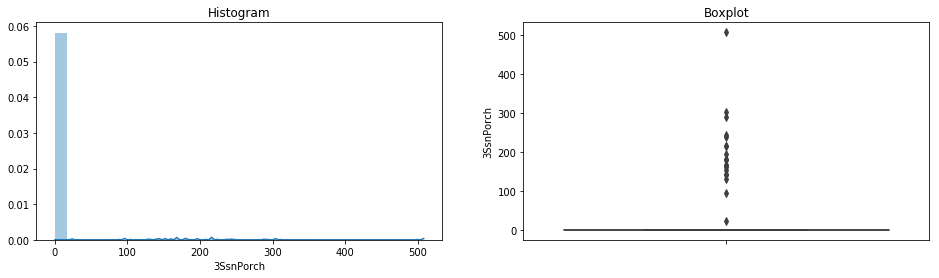

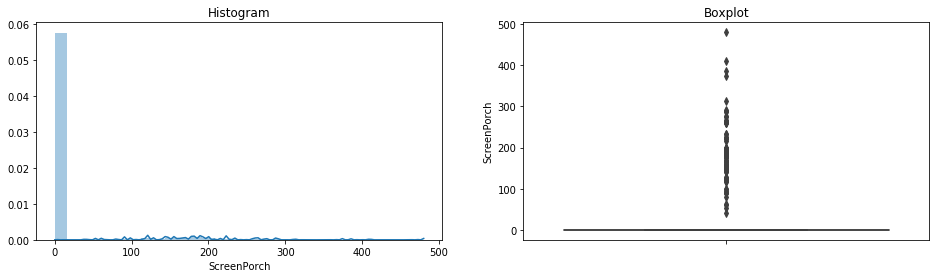

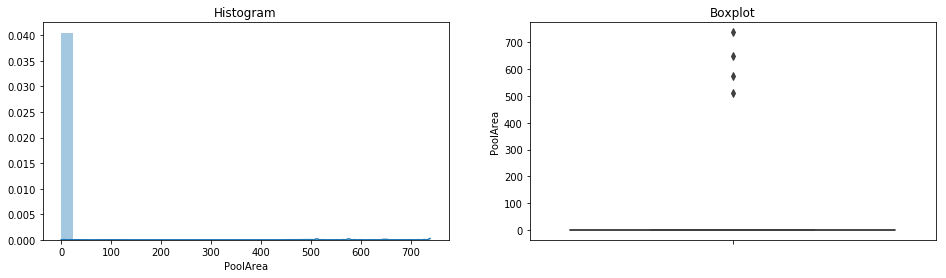

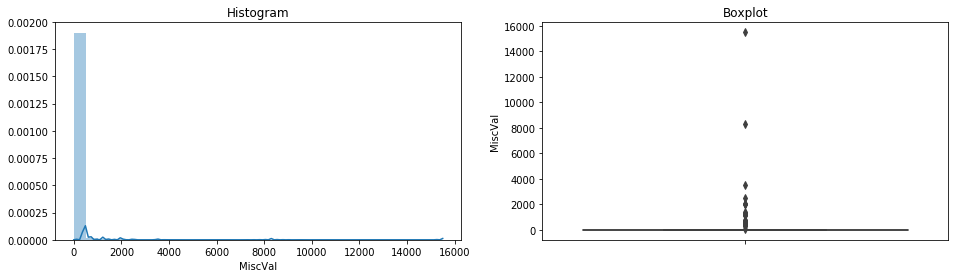

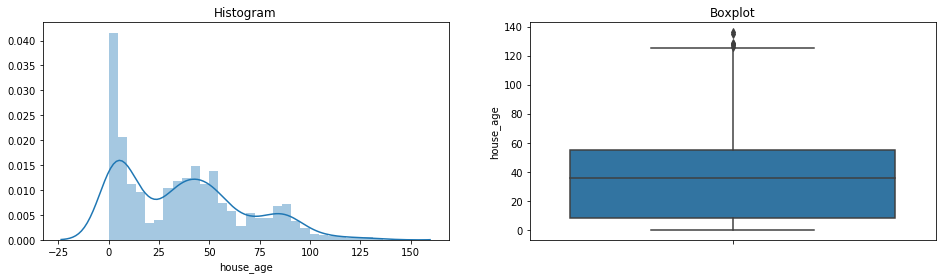

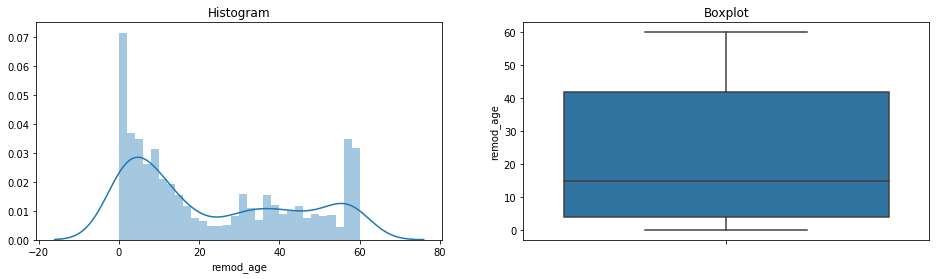

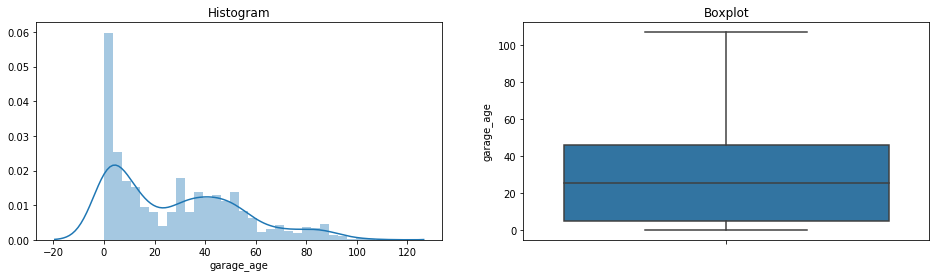

In [35]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for i in X_train.select_dtypes(include=numerics).columns:
    if i not in ordinal_variable:
        diagnostic_plots(X_train, i)

After analysing histograms and boxplots it is clear that:
* Some features have high number of 0 values. so dropping these features is a good choice as it will not provide any information to predicting target variable.
* Some features have special values which have very less frequency but it may exist in real life. So to keep the track with these rare values these are not considered as outliers.
* Rest of the features have outliers and eliminating them by capping method.

In [36]:
#function to calculate percentage of instances having value 0
def percentage_zero(df,variable):
    count=0
    for i in df.index:
        if df[variable][i] == 0:
            count+=1
    percentage=count/len(df)
    return percentage

In [37]:
#Calculating percentage of zero values
null_columns=[]
for i in X_train.select_dtypes(include=numerics).columns:
    if i not in ordinal_variable:
        print(i)
        print(percentage_zero(X_train,i))
        print('-----------')
#dropping fetures with very high 0 values
        if percentage_zero(X_train,i)>0.80:
            null_columns.append(i)
X_train.drop(null_columns,inplace=True,axis=1)
X_val.drop(null_columns,inplace=True,axis=1)
print(X_train.shape)
print(X_val.shape)
null_columns

LotFrontage
0.0
-----------
LotArea
0.0
-----------
OverallQual
0.0
-----------
OverallCond
0.0
-----------
MasVnrArea
0.6027397260273972
-----------
BsmtFinSF1
0.3261986301369863
-----------
BsmtFinSF2
0.8827054794520548
-----------
BsmtUnfSF
0.07876712328767123
-----------
TotalBsmtSF
0.023972602739726026
-----------
1stFlrSF
0.0
-----------
2ndFlrSF
0.5633561643835616
-----------
LowQualFinSF
0.9803082191780822
-----------
GrLivArea
0.0
-----------
BsmtFullBath
0.5873287671232876
-----------
BsmtHalfBath
0.9460616438356164
-----------
FullBath
0.005136986301369863
-----------
HalfBath
0.6207191780821918
-----------
BedroomAbvGr
0.003424657534246575
-----------
KitchenAbvGr
0.0008561643835616438
-----------
TotRmsAbvGrd
0.0
-----------
Fireplaces
0.4717465753424658
-----------
GarageCars
0.04965753424657534
-----------
GarageArea
0.04965753424657534
-----------
WoodDeckSF
0.5282534246575342
-----------
OpenPorchSF
0.4460616438356164
-----------
EnclosedPorch
0.853595890410959
-------

['BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [38]:
#function for outlier handling by capping
def find_boundaries(df, variable):

    # the boundaries are the quantiles

    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.95)

    return upper_boundary, lower_boundary

In [39]:
#outliers handling
vars_with_outliers=[['LotFrontage', 'LotArea', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea','WoodDeckSF', 'OpenPorchSF', 'house_age', 'remod_age',
       'garage_age']]
for i in vars_with_outliers:
    upper_limit, lower_limit = find_boundaries(X_train, i)
    X_train[i]= np.where(X_train[i] > upper_limit, upper_limit,
                       np.where(X_train[i]< lower_limit,lower_limit, X_train[i]))
    X_val[i]= np.where(X_val[i] > upper_limit, upper_limit,
                       np.where(X_val[i]< lower_limit,lower_limit, X_val[i]))


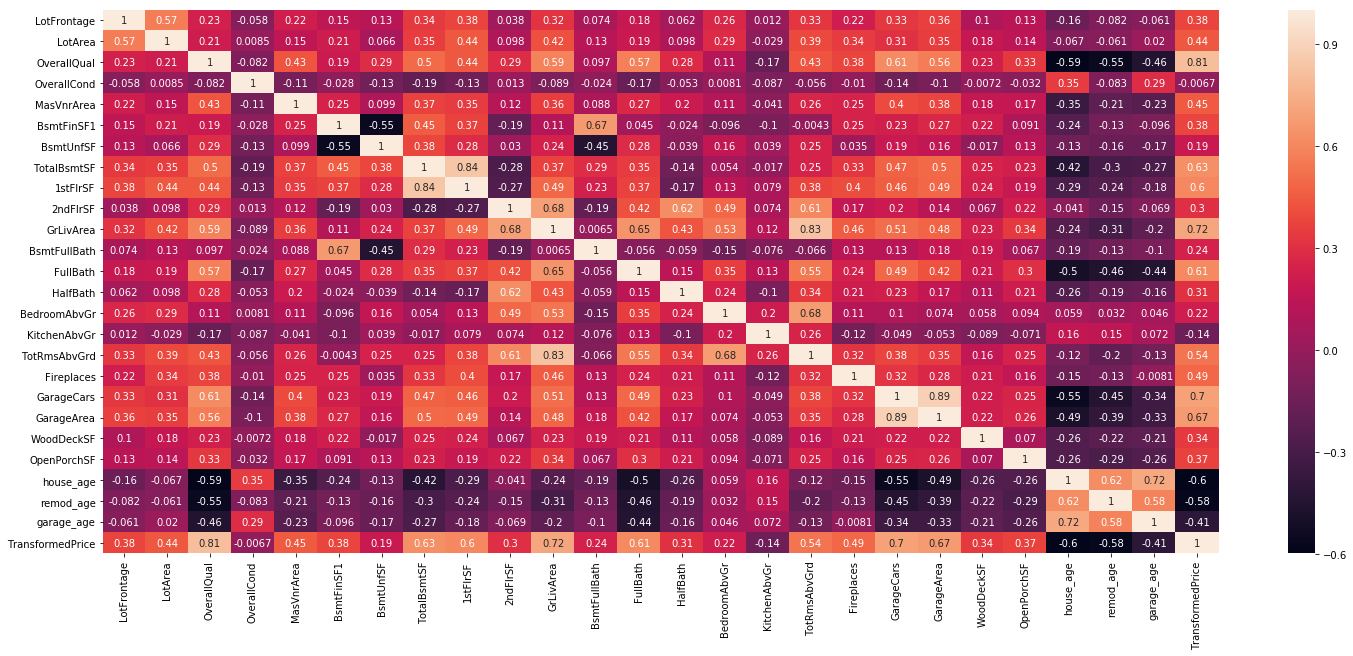

In [40]:
data=X_train.join(y_train)
fig=plt.figure(figsize=(25,10))
sns.heatmap(data.corr(),annot=True)

> **Observations from heatmap:**
1. Some variables has very weak correlation with sale price so, threshold value of 0.2 seems good. Variables having corelation value less than 0.2 will be dropped.
2. Some variable has high correlation with other variables it will lead to multicollinearity so I will keep only one variable from these as follows:
* house_age,remod_age and garage_age has high correlation with overallQual, so dropping first three is an good idea.
* TotalrmsAbvGrd and GrLivArea(drop totalRmsAbvGrd)
* GarageArea and garage cars(drop Garagecar )
* 1stFloorSf and TotalBsmtSF(drop 1stFloorSF)


In [41]:
low_corr_features = data.corr().index[abs(data.corr()['TransformedPrice'])<0.25]
low_corr_features

Index(['OverallCond', 'BsmtUnfSF', 'BsmtFullBath', 'BedroomAbvGr',
       'KitchenAbvGr'],
      dtype='object')

In [42]:
data.drop(['house_age', 'remod_age', 'garage_age','TotRmsAbvGrd','GarageCars', '1stFlrSF'],inplace=True,axis=1)
X_train.drop(['house_age', 'remod_age', 'garage_age','TotRmsAbvGrd','GarageCars', '1stFlrSF'],inplace=True,axis=1)
X_val.drop(['house_age', 'remod_age', 'garage_age','TotRmsAbvGrd','GarageCars', '1stFlrSF'],inplace=True,axis=1)
data.drop(low_corr_features,inplace=True,axis=1)
X_train.drop(low_corr_features,inplace=True,axis=1)
X_val.drop(low_corr_features,inplace=True,axis=1)
data.shape

(1168, 51)

In [43]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'KitchenQual',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

One hot encoding

In [44]:
ohe_enc = OneHotCategoricalEncoder(
    top_categories=None,
    drop_last=True)

ohe_enc.fit(X_train)
X_train=ohe_enc.transform(X_train)
X_val=ohe_enc.transform(X_val)
print(X_train.shape)
print(X_val.shape)

(1168, 145)
(292, 145)


In [45]:
X_train.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_Rare,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_2-STORY 1946 & NEWER,MSZoning_RL,MSZoning_FV,MSZoning_RM,LotShape_Reg,LotShape_IR1,LandContour_Lvl,LandContour_Rare,LotConfig_Inside,LotConfig_CulDSac,LotConfig_Corner,LotConfig_FR2,Neighborhood_NridgHt,Neighborhood_NAmes,Neighborhood_Rare,Neighborhood_CollgCr,Neighborhood_Somerst,Neighborhood_Edwards,Neighborhood_OldTown,Neighborhood_Gilbert,Condition1_Norm,Condition1_Rare,BldgType_1Fam,BldgType_Rare,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SLvl,HouseStyle_1.5Fin,RoofStyle_Hip,RoofStyle_Gable,Exterior1st_CemntBd,Exterior1st_MetalSd,Exterior1st_Wd Sdng,Exterior1st_VinylSd,Exterior1st_Plywood,Exterior1st_HdBoard,Exterior1st_BrkFace,Exterior2nd_CmentBd,Exterior2nd_MetalSd,Exterior2nd_Wd Sdng,Exterior2nd_VinylSd,Exterior2nd_Rare,Exterior2nd_Plywood,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_5,ExterQual_3,ExterQual_4,ExterCond_3,ExterCond_4,ExterCond_5,ExterCond_2,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,BsmtQual_5,BsmtQual_3,BsmtQual_4,BsmtQual_0,BsmtCond_3,BsmtCond_4,BsmtCond_0,BsmtCond_2,BsmtExposure_3,BsmtExposure_1,BsmtExposure_4,BsmtExposure_0,BsmtFinType1_6,BsmtFinType1_1,BsmtFinType1_5,BsmtFinType1_3,BsmtFinType1_0,BsmtFinType1_2,BsmtFinType2_1,BsmtFinType2_5,BsmtFinType2_3,BsmtFinType2_0,BsmtFinType2_4,BsmtFinType2_2,HeatingQC_5,HeatingQC_4,HeatingQC_3,HeatingQC_2,CentralAir_Y,Electrical_SBrkr,Electrical_Rare,KitchenQual_4,KitchenQual_3,KitchenQual_5,Functional_Typ,FireplaceQu_4,FireplaceQu_0,FireplaceQu_3,FireplaceQu_5,FireplaceQu_1,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_Missing,GarageFinish_Unf,GarageFinish_RFn,GarageFinish_Fin,GarageQual_3,GarageQual_2,GarageQual_0,GarageQual_4,GarageQual_5,GarageCond_3,GarageCond_2,GarageCond_0,GarageCond_4,GarageCond_5,PavedDrive_Y,PavedDrive_P,PoolQC_0,PoolQC_2,PoolQC_4,Fence_Missing,Fence_GdWo,Fence_GdPrv,Fence_MnPrv,SaleType_New,SaleType_WD,SaleCondition_Partial,SaleCondition_Normal,SaleCondition_Abnorml
618,90.0,11694.0,9,452.0,48.0,1734.0,0.0,1828.0,2,0,1,774,0.0,108.0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
870,60.0,6600.0,5,0.0,0.0,894.0,0.0,894.0,1,0,0,308,0.0,0.0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0
92,80.0,13360.0,5,0.0,713.0,876.0,0.0,964.0,1,0,0,432,0.0,0.0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0
817,69.0,13265.0,8,148.0,1218.0,1568.0,0.0,1689.0,2,0,2,857,150.0,59.0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0
302,100.0,13704.0,7,150.0,0.0,1541.0,0.0,1541.0,2,0,1,843,350.3,81.0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0


**Model Building**

Different models have been tried to compare the efficiency achieved by each one.

In [46]:
def grid_search(instance,parameters,X_training,y_training,X_validation,y_validation):
    grid_reg = GridSearchCV(instance, parameters, verbose=1 , scoring = "r2",cv=10)
    grid_reg.fit(X_training, y_training)
   
    print("Best Reg Model: " + str(grid_reg.best_estimator_))
    print("Best Score: " + str(grid_reg.best_score_))
    
    reg = grid_reg.best_estimator_
    reg.fit(X_training, y_training)
    y_pred_train = reg.predict(X_training)
    y_pred_val = reg.predict(X_validation)
    return r2_score(y_training, y_pred_train),np.sqrt(mean_squared_error(y_training, y_pred_train)),r2_score(y_validation, y_pred_val),np.sqrt(mean_squared_error(y_validation, y_pred_val))

    

**LInear Regression**

In [47]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred_train=linreg.predict(X_train)
y_pred_val=linreg.predict(X_val)
r2_lin_train=r2_score(y_train, y_pred_train)
rmse_lin_train=np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_lin_val=r2_score(y_val, y_pred_val)
rmse_lin_val=np.sqrt(mean_squared_error(y_val, y_pred_val))
print("R^2 Score Train: " + str(r2_lin_train))
print("RMSE Score Train: " + str(rmse_lin_train))
print("R^2 Score Test: " + str(r2_lin_val))
print("RMSE Score Test: " + str(rmse_lin_val))

R^2 Score Train: 0.9175565783930001
RMSE Score Train: 0.11537583356745451
R^2 Score Test: 0.823848719040382
RMSE Score Test: 0.1633073056702589


**Lasso**

In [48]:
lasso = Lasso()
parameters_lasso = {"alpha" : [1,0.1,.01,0.001,0.0001],"random_state":[0]}
r2_lasso_train,rmse_lasso_train,r2_lasso_val,rmse_lasso_val=grid_search(lasso,parameters_lasso,X_train,y_train,X_val,y_val)
print("R^2 Score: " + str(r2_lasso_train))
print("RMSE Score: " + str(rmse_lasso_train))
print("R^2 Score: " + str(r2_lasso_val))
print("RMSE Score: " + str(rmse_lasso_val))

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Reg Model: Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)
Best Score: 0.8917418070735434
R^2 Score: 0.9054785129638179
RMSE Score: 0.12353844217615731
R^2 Score: 0.8467167826162437
RMSE Score: 0.15233861912088453


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


**Ridge**

In [49]:
ridge = Ridge()
parameters_ridge = {"alpha" : [1,10,15,20,25,30],"random_state":[0], "solver" : ["auto"]}
r2_ridge_train,rmse_ridge_train,r2_ridge_val,rmse_ridge_val=grid_search(ridge,parameters_ridge,X_train,y_train,X_val,y_val)
print("R^2 Score: " + str(r2_ridge_train))
print("RMSE Score: " + str(rmse_ridge_train))
print("R^2 Score: " + str(r2_ridge_val))
print("RMSE Score: " + str(rmse_ridge_val))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Reg Model: Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=0, solver='auto', tol=0.001)
Best Score: 0.8944622232314585
R^2 Score: 0.911067621869844
RMSE Score: 0.11983034254603825
R^2 Score: 0.8485414938591764
RMSE Score: 0.1514291711725008


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished


**Random Forest Regressor**

In [50]:
rf = RandomForestRegressor()
parameters_rf = {"n_estimators" : [105,110,115], "criterion" : ["mse" , "mae"], "min_samples_split" : [2, 3, 5, 10], 
                 "max_features" : ["auto", "log2","sqrt"],"random_state":[0]}
r2_rf_train,rmse_rf_train,r2_rf_val,rmse_rf_val=grid_search(rf,parameters_rf,X_train,y_train,X_val,y_val)
print("R^2 Score: " + str(r2_rf_train))
print("RMSE Score: " + str(rmse_rf_train))
print("R^2 Score: " + str(r2_rf_val))
print("RMSE Score: " + str(rmse_rf_val))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 51.8min finished


Best Reg Model: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=110,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
Best Score: 0.8659252534166069
R^2 Score: 0.9800496293070697
RMSE Score: 0.05675607221929735
R^2 Score: 0.8611531853697559
RMSE Score: 0.14498753664151776


In [51]:
model_performances = pd.DataFrame({
    "Model" : ["Linear Regression", "Ridge", "Lasso", "Random Forest Regressor"],
    "R Squared_train" : [str(r2_lin_train)[0:5], str(r2_ridge_train)[0:5], str(r2_lasso_train)[0:5], str(r2_rf_train)[0:5]],
    "RMSE_train" : [str(rmse_lin_train)[0:8], str(rmse_ridge_train)[0:8], str(rmse_lasso_train)[0:8], str(rmse_rf_train)[0:8]],
    "R Squared_val" : [str(r2_lin_val)[0:5], str(r2_ridge_val)[0:5], str(r2_lasso_val)[0:5], str(r2_rf_val)[0:5]],
    "RMSE_val" : [str(rmse_lin_val)[0:8], str(rmse_ridge_val)[0:8], str(rmse_lasso_val)[0:8], str(rmse_rf_val)[0:8]]
})
model_performances.round(4)

,Model,R Squared_train,RMSE_train,R Squared_val,RMSE_val
0,Linear Regression,0.917,0.115375,0.823,0.163307
1,Ridge,0.911,0.119830,0.848,0.151429
2,Lasso,0.905,0.123538,0.846,0.152338
3,Random Forest Regressor,0.980,0.056756,0.861,0.144987


In [52]:
print("Sorted by R Squared:")
model_performances.sort_values(by="R Squared_val", ascending=False)

Sorted by R Squared:


,Model,R Squared_train,RMSE_train,R Squared_val,RMSE_val
3,Random Forest Regressor,0.980,0.056756,0.861,0.144987
1,Ridge,0.911,0.119830,0.848,0.151429
2,Lasso,0.905,0.123538,0.846,0.152338
0,Linear Regression,0.917,0.115375,0.823,0.163307


In [53]:
print("Sorted by RMSE:")
model_performances.sort_values(by="RMSE_val", ascending=True)

Sorted by RMSE:


,Model,R Squared_train,RMSE_train,R Squared_val,RMSE_val
3,Random Forest Regressor,0.980,0.056756,0.861,0.144987
1,Ridge,0.911,0.119830,0.848,0.151429
2,Lasso,0.905,0.123538,0.846,0.152338
0,Linear Regression,0.917,0.115375,0.823,0.163307
